# Исследование объявлений о продаже квартир

## Цель исследования

- Определить рыночную стоимость объектов недвижимости.
- Исследовать наличие рыночных аномалий и мошеннической деятельности.
- Установить, какие факторы влияют на ценообразование стоимости квартир.

Данное исследование будет использовано для построения автоматизированной системы оценки недвижимости. 

### Ход исследования

В качестве исходных данных используем архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. Данные предоставлены сервисом Яндекс.Недвижимость. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма). 

Исходные данные представлены файлом формата .csv, о качестве данных ничего неизвестно. Поэтому перед тем, как приступить к исследованию понадобится обзор данных. Данные проверим на ошибки и оценим их влияние на исследование. Далее создадим необходимые столбцы и приступим к проведению анализа.

<br>Таким образом исследование имеет следующие этапы:
- Обзор данных.
- Предобработка данных.
- Исследование основных параметров.
- Исследование зависимости цены от разных факторов.
- Вывод.

Исходные данные содержат следующую информацию:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении.

## Обзор данных

### Получение данных
Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [1]:
# импортируем необходимые модули
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# создаем датафрейм из файла .csv
data = pd.read_csv('real_estate_data.csv', sep='\t')

### Общая информация 
Изучим общую информацию о полученном датафрейме.

In [3]:
# выведем первые 5 строк датафрейма
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# получим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** <a id='1.3.2'></a>
- в ряде колонок имеются пропуски, что допустимо, если поле ввода информации на сайте является необязательным; 
- столбец `is_apartment` предполагает булев тип, но является строкой;
- небольшое количество объявлений не имеют данных в названии населенного пункта `locality_name`; 
- столбцы `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` должны быть представлены типом int64;
- столбец `first_day_exposition` содержит дату и должен быть представлен типом datetime64;
- наименование столбцов недостаточно информативно.

### Графики

Построим гистограммы для всех числовых столбцов таблицы.

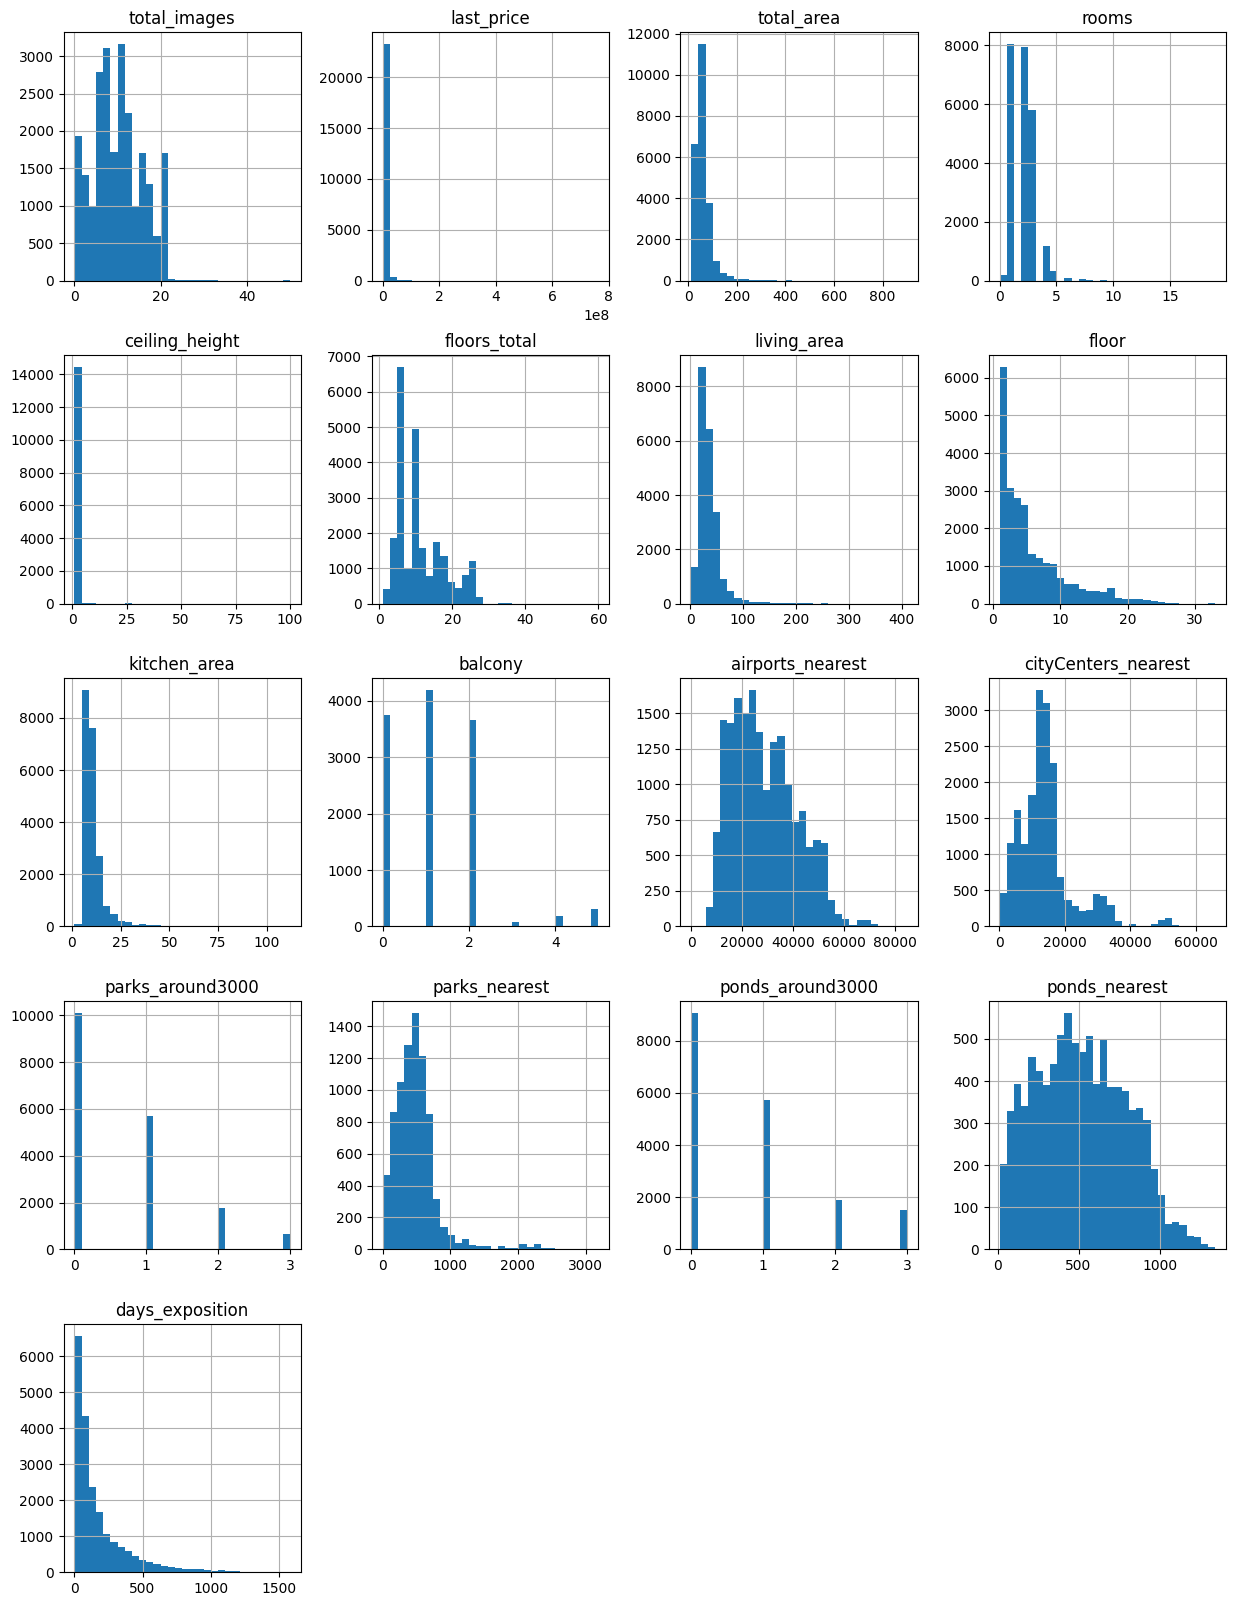

In [5]:
data.hist(figsize=(15, 20), bins=30)
plt.show()

**Вывод:**

- цена на момент снятия с публикации `last_price` в районе нуля, что вызывает вопросы;
- часть значений `total_area` близка к нулю, при том что общая площадь квартиры (в том числе студии) по действующим нормам не может быть менее 14 кв.м. ([СП 31-107-2004 п. 6.1.6](https://docs.cntd.ru/document/1200038763?marker=8OK0LN&section=text#:~:text=%C2%A0%C2%A0%C2%A0%C2%A0%C2%A06%20%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B-,6.1.6));
- имеются квартиры с нулевым числом комнат;
- высота потолков `ceiling_height` имеет немногочисленные выбросы. Возможно, это связано с пропущенной запятой (25 м. вместо 2,5 м.);
- жилая площадь `living_area` имеет часть значений близких к нулю;
- значительная часть объявлений снимается сразу после публикации `days_exposition`, что не характерно для продажи недвижимости, поскольку ликвидность недвижимости является относительно низкой и продажа может занимать месяцы, а в некоторых случаях - годы;

Данные замечания требуют проверки и, возможно, корректировки.
В остальных диаграммах существенных отклонений не обнаружено.

## Предобработка данных

### Переименование столбцов

Для удобства переименуем столбцы.

In [6]:
data = data.rename(
    columns={
        'first_day_exposition':'publ_date',
        'rooms':               'rooms_num',              
        'airports_nearest':    'airport_dist',
        'cityCenters_nearest': 'city_center_dist',
        'parks_nearest':       'park_dist',
        'ponds_nearest':       'pond_dist',
        'parks_around3000':    'parks_around_num',
        'ponds_around3000':    'ponds_around_num',
        'studio':              'is_studio',
        'balcony':             'balcony_num',
        'days_exposition':     'publ_num_days',
        'open_plan':           'is_open_plan',   
    }
)

Обновленный список столбцов:
- `airport_dist` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony_num` — число балконов
- `ceiling_height` — высота потолков (м)
- `city_center_dist` — расстояние до центра города (м)
- `publ_num_days` — сколько дней было размещено объявление (от публикации до снятия)
- `publ_date` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `is_open_plan` — свободная планировка (булев тип)
- `parks_around_num` — число парков в радиусе 3 км
- `park_dist` — расстояние до ближайшего парка (м)
- `ponds_around_num` — число водоёмов в радиусе 3 км
- `pond_dist` — расстояние до ближайшего водоёма (м)
- `rooms_num` — число комнат
- `is_studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Обработка пропусков

Определим, в каких столбцах есть пропуски, установим их количество.

In [7]:
# вспомогательная переменная - общее количество строк до удаления
num_rows = data.shape[0]
print('Всего строк:', num_rows)

# Количество пропусков
print('Число пропусков:') 
print(data.isna().sum().sort_values(ascending=False)) 

Всего строк: 23699
Число пропусков:
is_apartment        20924
park_dist           15620
pond_dist           14589
balcony_num         11519
ceiling_height       9195
airport_dist         5542
city_center_dist     5519
ponds_around_num     5518
parks_around_num     5518
publ_num_days        3181
kitchen_area         2278
living_area          1903
floors_total           86
locality_name          49
total_images            0
last_price              0
is_studio               0
floor                   0
rooms_num               0
publ_date               0
total_area              0
is_open_plan            0
dtype: int64


<div class="alert alert-info">
Определим процент пропусков от общего числа значений в столбцах.

In [8]:
pd.DataFrame(round(data.isna().mean()*100,2).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
is_apartment,88.290000
park_dist,65.910000
pond_dist,61.560000
balcony_num,48.610000
ceiling_height,38.800000
airport_dist,23.380000
city_center_dist,23.290000
ponds_around_num,23.280000
parks_around_num,23.280000
publ_num_days,13.420000


**Если число балконов `balcony_num` не указано, скорее всего их нет в квартире. Заменим пропуски нулями.**

In [9]:
data['balcony_num'] = data['balcony_num'].fillna(0) 

**Заменим пропуски в столбце `parks_around_num` на 1, если `park_dist` <= 3000 м.
<br>Eсли `park_dist` > 3000, то пропуски в `parks_around_num` заменим на 0.**

In [10]:
# получим срез 'park_dist' <= 3000 и получим значения столбца `parks_around_num`.
data.query('park_dist <= 3000')['parks_around_num'].isna().sum()

0

In [11]:
# получим срез 'park_dist' > 3000 и получим значения столбца `parks_around_num`.
data.query('park_dist > 3000')['parks_around_num'].isna().sum()

0

In [12]:
# Посчитаем количество пропусков одновременно в 2-х столбцах
data.query('pond_dist.isna()')['parks_around_num'].isna().sum()

5518

Пропусков подлежащих замене не обнаружено. Значения пропущены одновременно в 2-х столбцах.

**Заменим пропуски в столбце `ponds_around_num` на 1, если `pond_dist` <= 3000 м.
<br>Если `pond_dist` > 3000, то `ponds_around_num` = 0.**

In [13]:
# получим срез 'park_dist' <= 3000 по столбцу `parks_around_num`. Найдем пропуски.
data.query('pond_dist <= 3000')['ponds_around_num'].isna().sum()

0

In [14]:
# получим срез 'park_dist' > 3000 по столбцу `parks_around_num`. Найдем пропуски.
data.query('pond_dist > 3000')['ponds_around_num'].isna().sum()

0

In [15]:
# Посчитаем количество пропусков одновременно в 2-х столбцах
data.query('pond_dist.isna()')['ponds_around_num'].isna().sum()

5518

Пропусков подлежащих замене не обнаружено. Значения пропущены одновременно в 2-х столбцах.

**Исследуем столбец `is_apartment`. Если обнаружится, что в заполненных данных преобладает значение `True`, значит люди предпочитают не заполнять это поле, если у них обычная квартира. В таком случае пропуски заменим на `False`.**

In [16]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Предположение не подтвердилось. Оставим пропуски, чтобы не получить искаженные данные.

In [17]:
# удаление строк с пропусками
data = data.dropna(subset=['locality_name',
                           'floors_total',
                           'living_area',
                           'kitchen_area'])

In [18]:
print(f'Осталось строк: {data.shape[0]} из {num_rows} ({round(data.shape[0]/num_rows*100)}%)')

Осталось строк: 20905 из 23699 (88%)


In [19]:
# выведем процент пропусков после их обработки.
pd.DataFrame(round(data.isna().mean()*100,2).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
is_apartment,87.920000
park_dist,65.360000
pond_dist,61.450000
ceiling_height,36.290000
airport_dist,22.320000
ponds_around_num,22.210000
parks_around_num,22.210000
city_center_dist,22.210000
publ_num_days,13.800000
kitchen_area,0.000000


**Вывод:**

В данных присутствует значительное число пропусков. 
Это может быть связано со следующим:
- На сайте есть необязательные поля. 
- Со временем число полей на сайте увеличивалось, а снятые объявления не имели той информации, что есть у новых.
- Технический сбой, ошибка загрузки из БД и т.п.

Часть пропусков удалось устранить, но большая часть осталась, поскольку их устранение может привести к значительному искажению результатов.

### Замена типов данных

Для удобства анализа изменим тип данных в следующих столбцах:
- `is_apartment` 
- `floors_total` 
- `balcony_num` 
- `parks_around_num`
- `ponds_around_num`
- `is_apartment`
- `publ_date`

Перед изменением типов проверим данные столбцов на корректность.

In [20]:
# выведем значения слотбцов
for i in ['is_apartment', 'floors_total', 'balcony_num', 'parks_around_num', 'ponds_around_num']:
    print(f'{i}\n{data[i].value_counts()}\n')

is_apartment
False    2492
True       33
Name: is_apartment, dtype: int64

floors_total
5.0     5158
9.0     3468
12.0    1223
16.0    1216
10.0    1049
4.0     1040
25.0     912
6.0      832
17.0     743
3.0      582
7.0      536
14.0     497
18.0     410
24.0     389
2.0      345
8.0      343
15.0     311
23.0     297
19.0     267
22.0     243
20.0     229
13.0     199
11.0     171
27.0     147
21.0     119
26.0     110
35.0      22
28.0      20
1.0       19
36.0       3
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

balcony_num
0.0    13068
1.0     3967
2.0     3346
5.0      278
4.0      172
3.0       74
Name: balcony_num, dtype: int64

parks_around_num
0.0    9025
1.0    5102
2.0    1558
3.0     577
Name: parks_around_num, dtype: int64

ponds_around_num
0.0    8203
1.0    5036
2.0    1693
3.0    1330
Name: ponds_around_num, dtype: int64



In [21]:
# выведем первые 10 значений столбца 'publ_num_days'
data['publ_num_days'].head(10)

0       NaN
1      81.0
2     558.0
4     121.0
5      55.0
6     155.0
8     189.0
9     289.0
10    137.0
11      7.0
Name: publ_num_days, dtype: float64

In [22]:
# минимальное и максимальные значения в столбце 'publ_num_days'
print('минимум:', data['publ_num_days'].min())
print('максимум:', data['publ_num_days'].max()) 

минимум: 1.0
максимум: 1580.0


**Некорректных записей не обнаружено, заменим типы данных.**

In [23]:
# заменим тип данных с float64 на int64
for i in ['floors_total', 'balcony_num', 'parks_around_num', 'ponds_around_num', 'publ_num_days']:
    try:
        data[i] = data[i].astype('Int64')
        print(f'{i:<18} - тип изменен с float64 на int64.')
    except:
        print(f'{i:<18} - ошибка, тип не изменен.')

floors_total       - тип изменен с float64 на int64.
balcony_num        - тип изменен с float64 на int64.
parks_around_num   - тип изменен с float64 на int64.
ponds_around_num   - тип изменен с float64 на int64.
publ_num_days      - ошибка, тип не изменен.


In [24]:
# изменим тип данных в столбце 'publ_num_days' другим способом
print('Среднее значение столбца до изменения:', data['publ_num_days'].mean().round(3))
data['publ_num_days'] = np.floor(pd.to_numeric(data['publ_num_days'], errors='coerce')).astype('Int64')
print('Среднее значение столбца после изменения:', data['publ_num_days'].mean().round(3))

Среднее значение столбца до изменения: 185.511
Среднее значение столбца после изменения: 185.511


In [25]:
# изменим тип столбца 'is_apartment' с object на boolean
# проверим количество элкментов до и после изменения
print('Количество значений до изменения:', data['is_apartment'].count())
data['is_apartment'] = data['is_apartment'].convert_dtypes()
print('Количество значений после изменения:', data['is_apartment'].count())

# посчитаем и выведем количество элементов типа bool после изменения типа
print('Количество значений True (bool):', data.query('is_apartment == True')['is_apartment'].count())
print('Количество значений False (bool):', data.query('is_apartment == False')['is_apartment'].count())

Количество значений до изменения: 2525
Количество значений после изменения: 2525
Количество значений True (bool): 33
Количество значений False (bool): 2492


In [26]:
# преобразуем столбец 'publ_date' в формат datetime
data['publ_date'] = pd.to_datetime(data['publ_date'], format='%Y-%m-%dT%H:%M:%S')

In [27]:
# выведем первые строки таблицы
data.head()

,total_images,last_price,total_area,publ_date,rooms_num,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_num,locality_name,airport_dist,city_center_dist,parks_around_num,park_dist,ponds_around_num,pond_dist,publ_num_days
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,<NA>,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,<NA>,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,<NA>,...,9.1,0,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55


In [28]:
# получим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20905 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   total_images      20905 non-null  int64         
 1   last_price        20905 non-null  float64       
 2   total_area        20905 non-null  float64       
 3   publ_date         20905 non-null  datetime64[ns]
 4   rooms_num         20905 non-null  int64         
 5   ceiling_height    13318 non-null  float64       
 6   floors_total      20905 non-null  Int64         
 7   living_area       20905 non-null  float64       
 8   floor             20905 non-null  int64         
 9   is_apartment      2525 non-null   boolean       
 10  is_studio         20905 non-null  bool          
 11  is_open_plan      20905 non-null  bool          
 12  kitchen_area      20905 non-null  float64       
 13  balcony_num       20905 non-null  Int64         
 14  locality_name     2090

**Вывод:**

Заменили типы данных в 7 столбцах. Избавились от десятичных нулей при переходе с float на int, а также привели столбцы к логическому типу и типу  даты, что упростит анализ.

### Обработка дубликатов

**Выведем количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [29]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

**Произведем поиск неявных дубликатов.**

In [30]:
# получим уникальные значения столбца 'locality_name'
pd.set_option("display.max_rows", None)
print('Уникальных значений:', data['locality_name'].nunique())
data['locality_name'].value_counts().head(20)

Уникальных значений: 345


Санкт-Петербург            14037
посёлок Мурино               402
посёлок Шушары               392
Всеволожск                   357
Пушкин                       337
Колпино                      322
Гатчина                      290
посёлок Парголово            288
деревня Кудрово              226
Петергоф                     190
Выборг                       190
Сестрорецк                   166
Красное Село                 164
Кудрово                      150
деревня Новое Девяткино      132
Сертолово                    132
Ломоносов                    124
Сланцы                        96
Тосно                         92
Волхов                        91
Name: locality_name, dtype: int64

Заменим значения для уменьшения уникальных строк

In [31]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 
              'городской поселок', 
              'коттеджный поселок'], 'поселок', regex=True)
)

In [32]:
# получим уникальные значения столбца 'locality_name'
print('Уникальных значений:', data['locality_name'].nunique())
data['locality_name'].value_counts().head()

Уникальных значений: 302


Санкт-Петербург    14037
поселок Мурино       430
поселок Шушары       392
Всеволожск           357
Пушкин               337
Name: locality_name, dtype: int64

**Вывод:**

Количество уникальных значений населенных пунктов удалось уменьшить за счет удаления неявных дубликатов.

### Добавление новых столбцов

**Добавим в таблицу новые столбцы со следующими параметрами:**
- `price_sq_m` - цена одного квадратного метра 
(стоимость объекта / общую площадь, округляем до двух знаков после запятой);
- `publ_day_week` - день недели публикации объявления (0 — понедельник, ... , 6 — воскресенье);
- `publ_month` - месяц публикации объявления;
- `publ_year` - год публикации объявления;
- `floor_category` - тип этажа квартиры (значения: «первый», «последний», «другой»);
- `center_dist_km` - расстояние до центра города в километрах (перевеводим из м в км и округляем до ближайших целых значений).

In [33]:
# добавляем стоимость 1 кв. м.
data['price_sq_m'] = (data['last_price'] / data['total_area']).round(2).astype('Float64')

# добавляем день недели публикации объявления
data['publ_day_week'] = data['publ_date'].dt.dayofweek.astype('Int64') 

# добавляем месяц публикации объявления
data['publ_month'] = data['publ_date'].dt.month.astype('Int64')

# добавляем столбец с годом публикации
data['publ_year'] =  data['publ_date'].dt.year.astype('Int64')

In [34]:
# добавляем тип этажа
# создадим функцию для присвоения категорий
def type_fl(row):
    if row['floor'] is pd.NA:
        return pd.NA
    elif row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] is pd.NA:
        return pd.NA
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# формируем значения столбца с помощью функции   
data['floor_category'] = data.apply(type_fl, axis=1)   

In [35]:
# добавляем расстояние до центра города в км.
data['center_dist_km'] = (data['city_center_dist'] / 1000).round(0).astype('Int64')

In [36]:
# выведем первые строки новых столбцов
data[[
    'price_sq_m',
    'publ_day_week',
    'publ_month',
    'publ_year', 
    'center_dist_km'    
]].head(10)

,price_sq_m,publ_day_week,publ_month,publ_year,center_dist_km
0,120370.37,3,3,2019,16
1,82920.79,1,12,2018,19
2,92785.71,3,8,2015,14
4,100000.0,1,6,2018,8
5,95065.79,0,9,2018,<NA>
6,99195.71,3,11,2017,19
8,87454.76,2,5,2018,<NA>
9,88524.59,6,2,2017,15
10,127525.25,3,11,2017,14
11,75000.0,0,8,2018,52


In [37]:
# Общая информация об обновленной таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20905 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   total_images      20905 non-null  int64         
 1   last_price        20905 non-null  float64       
 2   total_area        20905 non-null  float64       
 3   publ_date         20905 non-null  datetime64[ns]
 4   rooms_num         20905 non-null  int64         
 5   ceiling_height    13318 non-null  float64       
 6   floors_total      20905 non-null  Int64         
 7   living_area       20905 non-null  float64       
 8   floor             20905 non-null  int64         
 9   is_apartment      2525 non-null   boolean       
 10  is_studio         20905 non-null  bool          
 11  is_open_plan      20905 non-null  bool          
 12  kitchen_area      20905 non-null  float64       
 13  balcony_num       20905 non-null  Int64         
 14  locality_name     2090

**Вывод:**

Новые столбцы добавлены

## Исследование основных параметров

Исследуем следующие параметры и построим гистограммы:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

### Общая площадь

In [38]:
# вспомогательная переменная - размер графиков
s = (10, 5)

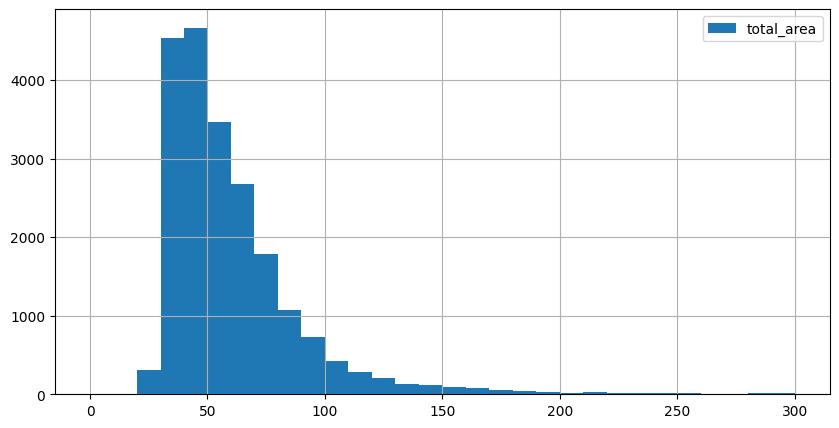

In [39]:
# построим гистограмму
data['total_area'].hist(bins=30, legend=True, range=(0, 300), figsize=s)
plt.show()

In [40]:
# получим общую информацию о столбце
data['total_area'].describe()

count    20905.000000
mean        60.509551
std         34.490375
min         14.000000
25%         40.500000
50%         52.100000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

### Жилая площадь

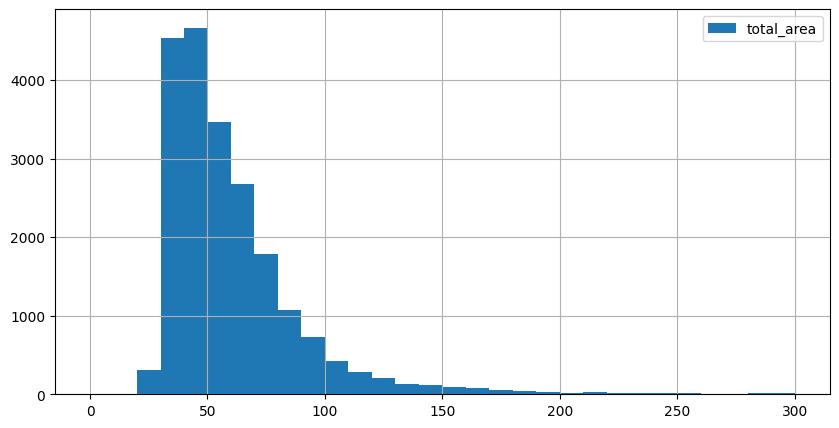

In [41]:
# Построим гистограмму
data['total_area'].hist(bins=30, legend=True, range=(0, 300), figsize=s)
plt.show()

In [42]:
# получим общую информацию о столбце
data['living_area'].describe()

count    20905.000000
mean        34.633910
std         21.931774
min          2.000000
25%         18.800000
50%         30.100000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

In [43]:
# Число пропусков
data['living_area'].isna().sum()

0

### Площадь кухни

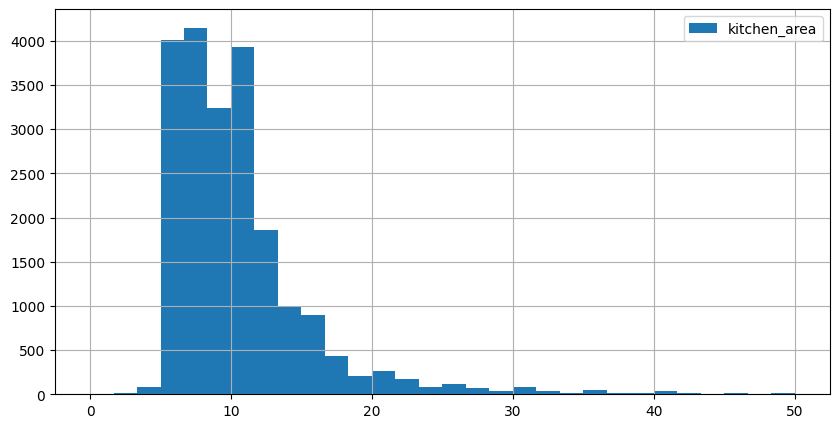

In [44]:
# Построим гистограмму
data['kitchen_area'].hist(bins=30, legend=True, range=(0, 50), figsize=s)
plt.show()

In [45]:
# получим общую информацию о столбце
data['kitchen_area'].describe()

count    20905.000000
mean        10.509280
std          5.841913
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [46]:
# Число пропусков
data['kitchen_area'].isna().sum()

0

### Цена объекта

In [47]:
# получим общую информацию о столбце
data['last_price'].describe()

count    2.090500e+04
mean     6.503258e+06
std      9.603551e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [48]:
# Число пропусков
data['last_price'].isna().sum()

0

In [49]:
# Получим минимальные значения
data['last_price'].sort_values().head()

8793      12190.0
17456    430000.0
17676    450000.0
9581     450000.0
5698     450000.0
Name: last_price, dtype: float64

Оставим значения не ниже 430 тыс. руб., поскольку цена 12190 руб. выглядит нереалистично.

In [50]:
data = data.query('last_price >= 430000')

In [51]:
# получим максимальные значения
data['last_price'].sort_values().tail()

22831    289238400.0
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
Name: last_price, dtype: float64

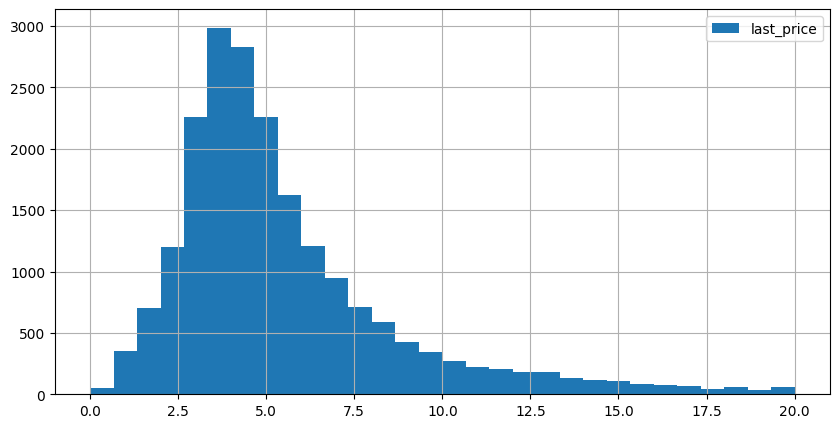

In [52]:
# Построим гистограмму цены объекта
(data['last_price'] / 1000000).hist(bins=30, legend=True, range=(0, 20), figsize=s)
plt.show()

**Цена объекта в млн.руб.**

In [53]:
# получим общую информацию о столбце
data['last_price'].describe()

count    2.090400e+04
mean     6.503568e+06
std      9.603676e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

Выбивающееся значение удалено, минимум столбца обновлен.

### Количество комнат

In [54]:
# получим общую информацию о столбце
data['rooms_num'].describe()

count    20904.000000
mean         2.095293
std          1.064808
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_num, dtype: float64

In [55]:
# Число пропусков
data['rooms_num'].isna().sum()

0

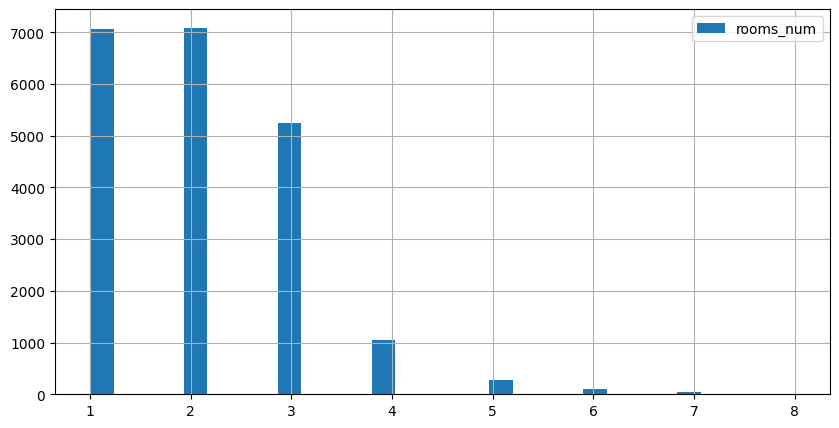

In [56]:
# Построим гистограмму количества комнат
data['rooms_num'].hist(bins=30, legend=True, range=(1, 8), figsize=s)
plt.show()

### Высота потолков

In [57]:
# получим общую информацию о столбце
data['ceiling_height'].describe()

count    13317.000000
mean         2.764870
std          1.246844
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [58]:
# Число пропусков
data['ceiling_height'].isna().sum()

7587

Присутствуют некорректные значения высоты потолков (1 м, 100 м и т.п.).

In [59]:
# выведем значения высоты более 15 м.
data.query('ceiling_height > 15')['ceiling_height']

3148      32.0
4643      25.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
17496     20.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

Очевидно пользователи пропустили точку и указали высоту в 10 раз больше. Исправим эти значения.

In [60]:
# Уменьшаем высоту в 10 раз, при значениях выше 15 м.
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] /= 10

In [61]:
# выведем значения высоты менее 2 м.
data.query('ceiling_height < 2')['ceiling_height']

5712     1.20
16934    1.75
22590    1.00
Name: ceiling_height, dtype: float64

Значения 1 и 1.2 м выглядят неправдоподобно, удалим эти строки.

In [62]:
# удаляем строки, где высота потолка меньше 1.75 м. 
print('Строк в таблице до удаления:', data.shape[0])
data = data.query('~(ceiling_height < 1.75)')
print('Строк в таблице после удаления:', data.shape[0])

Строк в таблице до удаления: 20904
Строк в таблице после удаления: 20902


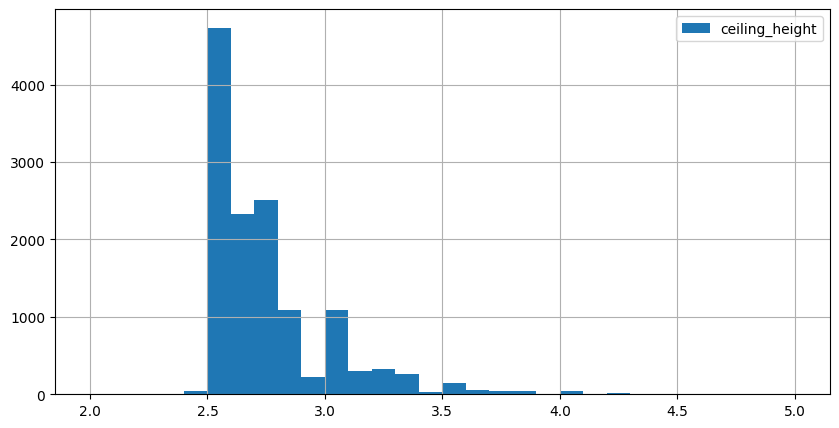

In [63]:
# Построим гистограмму высоты потолков
data['ceiling_height'].hist(bins=30, legend=True, range=(2, 5), figsize=s)
plt.show()

In [64]:
# получим общую информацию о столбце
data['ceiling_height'].describe()

count    13315.000000
mean         2.726517
std          0.309705
min          1.750000
25%          2.500000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

**Вывод:**

Значения высоты потолков откорректированы. Медианное значение: 2,65 м.

### Тип этажа

In [65]:
# получим общую информацию о столбце
data['floor_category'].value_counts()

другой       15359
последний     2988
первый        2555
Name: floor_category, dtype: int64

In [66]:
# Число пропусков
data['floor_category'].isna().sum()

0

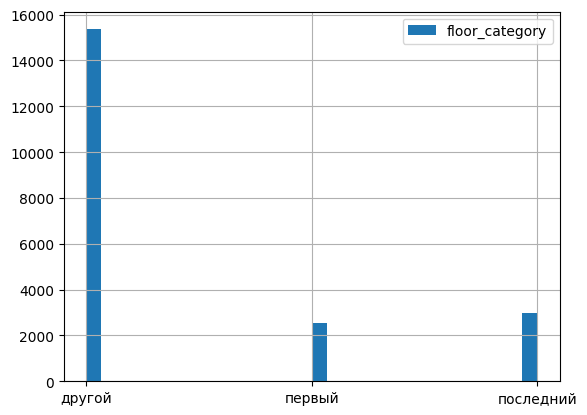

In [67]:
# Построим гистограмму
data['floor_category'].hist(bins=30, legend=True, range=(0, 2))
plt.show()

**Вывод:**

Большая часть квартир продается в категории "другой", что логично, ведь промежуточных этажей больше всего. Количества объявлений схожи для первого и последнего этажа.

### Общее количество этажей в доме

In [68]:
# получим общую информацию о столбце
data['floors_total'].describe()

count      20902.0
mean     10.560377
std        6.51809
min            1.0
25%            5.0
50%            9.0
75%           15.0
max           60.0
Name: floors_total, dtype: Float64

In [69]:
# количество квартир по этажам
data['floors_total'].value_counts()

5     5158
9     3468
12    1222
16    1216
10    1049
4     1040
25     911
6      832
17     743
3      582
7      536
14     497
18     410
24     389
2      344
8      343
15     311
23     297
19     267
22     243
20     229
13     199
11     171
27     147
21     119
26     110
35      22
28      20
1       19
36       3
60       1
29       1
33       1
52       1
37       1
Name: floors_total, dtype: Int64

In [70]:
# Число пропусков
data['floors_total'].isna().sum()

0

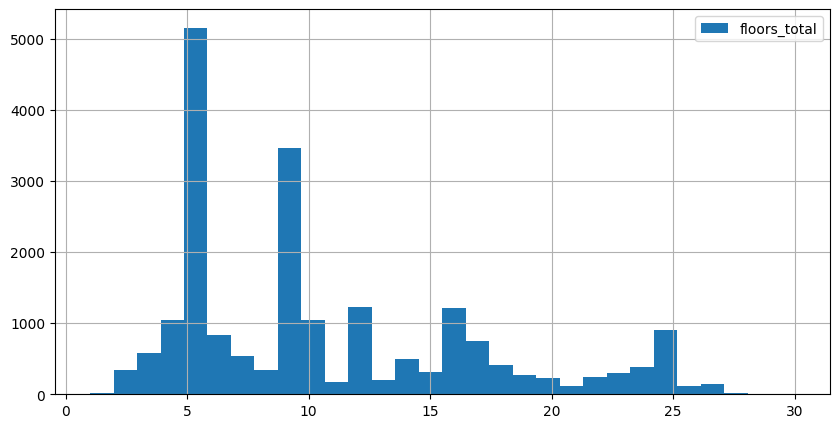

In [71]:
# Построим гистограмму
data['floors_total'].hist(bins=30, legend=True, range=(1,30), figsize=s)
plt.show()

**Вывод:**

Максимальное число объявлений в 5- и 9-этажных домах.

### Расстояние до центра города

In [72]:
# получим общую информацию о столбце
data['city_center_dist'].describe()

count    16259.000000
mean     14247.444185
std       8670.465411
min        181.000000
25%       9350.000000
50%      13114.000000
75%      16257.000000
max      65968.000000
Name: city_center_dist, dtype: float64

In [73]:
# Число пропусков
data['city_center_dist'].isna().sum()

4643

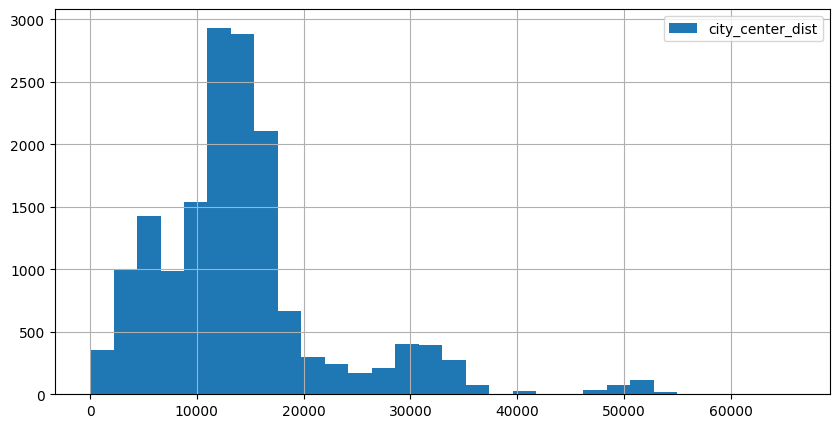

In [74]:
# Построим гистограмму
data['city_center_dist'].hist(bins=30, legend=True, range=(0, 66000), figsize=s)
plt.show()

**Вывод:**

Основная часть квартир расположена в пределах 14 км. от центра города.

### Расстояние до ближайшего парка

In [75]:
# получим общую информацию о столбце
data['park_dist'].describe()

count    7239.000000
mean      487.859373
std       337.740657
min         1.000000
25%       287.000000
50%       453.000000
75%       610.000000
max      3190.000000
Name: park_dist, dtype: float64

In [76]:
# Число пропусков
data['park_dist'].isna().sum()

13663

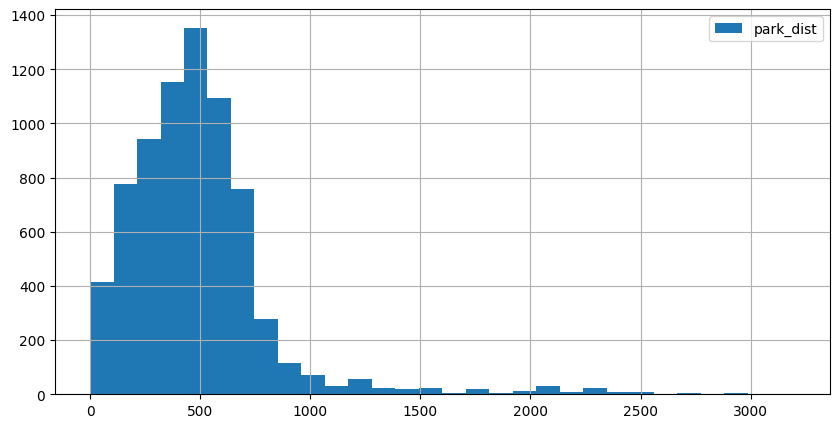

In [77]:
# Построим гистограмму
data['park_dist'].hist(bins=30, legend=True, range=(0, 3200), figsize=s)
plt.show()

**Вывод:**

Основная часть квартир находится на расстоянии не более 500 м. от ближайшего парка.

### Скорость продажи квартиры <a id='4.11'></a>

**Изучим столбец `publ_num_days` (сколько дней было размещено объявление), чтобы понять, с какой скоростью продавались квартиры.**

In [78]:
# получим общую информацию о столбце
data['publ_num_days'].describe()

count       18017.0
mean     185.527058
std      222.048186
min             1.0
25%            45.0
50%           102.0
75%           239.0
max          1580.0
Name: publ_num_days, dtype: Float64

In [79]:
# Число пропусков
data['publ_num_days'].isna().sum()

2885

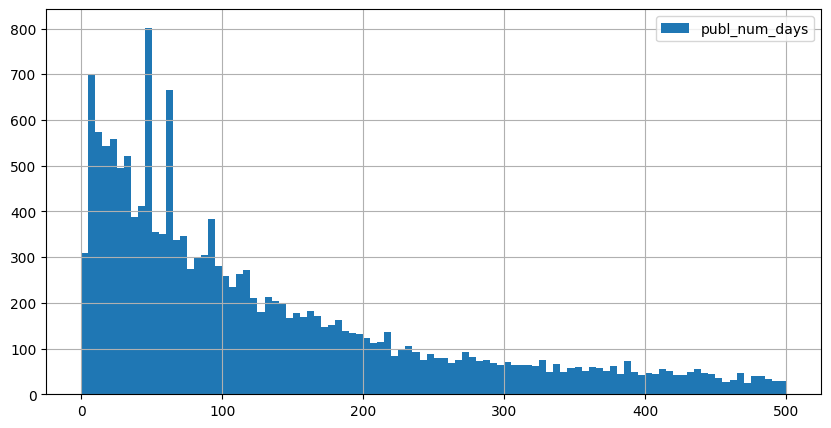

In [80]:
# Построим гистограмму
data['publ_num_days'].hist(bins=100, legend=True, range=(0, 500), figsize=s)
plt.show()

### Cтоимость квадратного метра

In [81]:
group_locality_name = pd.pivot_table(data,
                                     index='locality_name',
                                     values='price_sq_m',
                                     aggfunc=['count', 'median'],                                    
                                    )
group_locality_name.columns = list(map("_".join, group_locality_name.columns))
group_locality_name.sort_values(by='count_price_sq_m', ascending = False).head(10)

,count_price_sq_m,median_price_sq_m
locality_name,,
Санкт-Петербург,14035,104231.97
поселок Мурино,430,84922.645
поселок Шушары,392,77223.32
Всеволожск,357,65789.47
Пушкин,337,100000.0
Колпино,322,74723.745
Гатчина,290,67746.285
поселок Парголово,288,92271.975
деревня Кудрово,226,91715.12


## Исследование зависимости цены от разных факторов

Рассмотрим влияние на стоимость квартиры следующих факторов:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

### Зависимость цены от общей площади

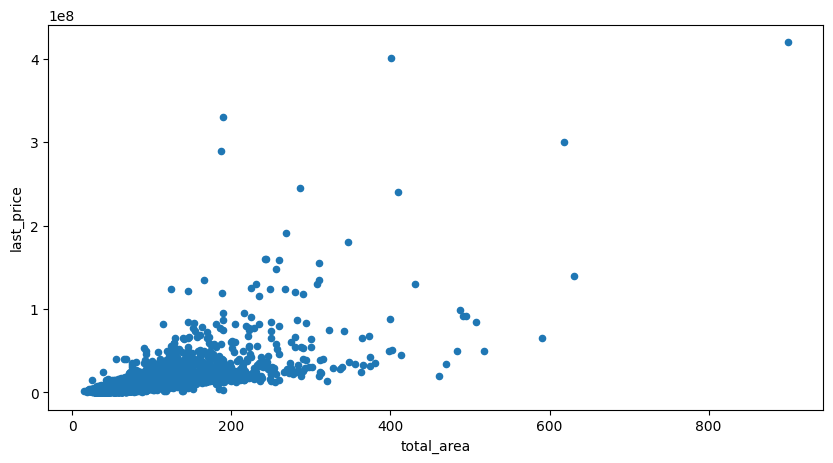

In [82]:
# построим точечную диаграмму
data.plot(x='total_area', y='last_price', kind='scatter', figsize=s) 
plt.show()

In [83]:
# вычислим коэффициент корреляции Пирсона
data['last_price'].corr(data['total_area']).round(2)

0.69

**Вывод:**

Наблюдаем положительную корреляцию между ценой квартиры и общей площадью.

### Зависимость цены от жилой площади

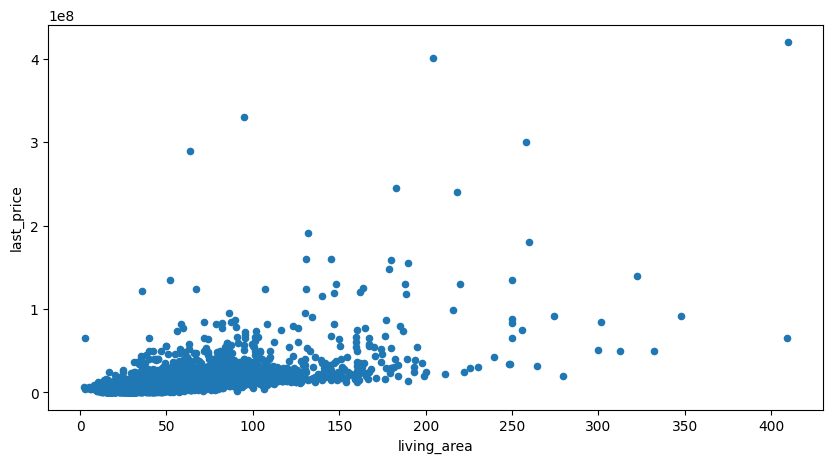

In [84]:
# построим точечную диаграмму
data.plot(x='living_area', y='last_price', kind='scatter', figsize=s) 
plt.show()

In [85]:
# вычислим коэффициент корреляции Пирсона
data['living_area'].corr(data['total_area']).round(2)

0.94

**Вывод:**

Наблюдаем сильную положительную корреляцию между ценой квартиры и жилой площадью.

### Зависимость цены от площади кухни

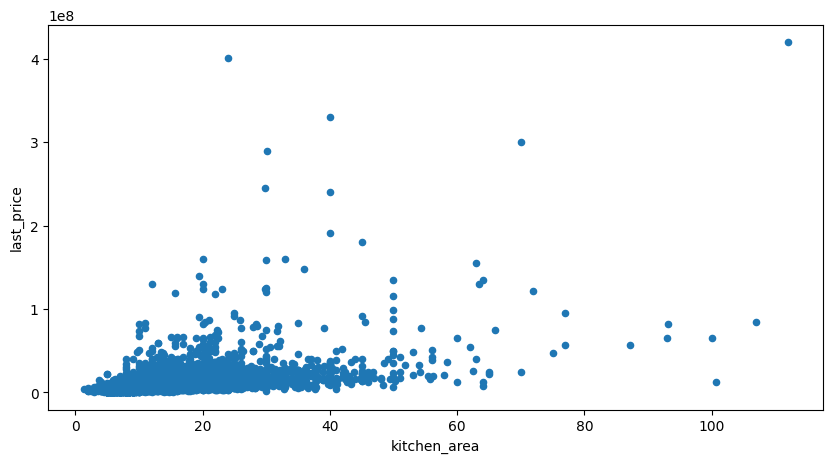

In [86]:
# построим точечную диаграмму
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=s) 
plt.show()

In [87]:
# вычислим коэффициент корреляции Пирсона
data['kitchen_area'].corr(data['total_area']).round(2)

0.61

**Вывод:**

Наблюдаем положительную корреляцию между ценой квартиры и площадью кухни.

### Зависимость цены от количества комнат

- Cгруппируем данные по количеству комнат.
- Вычислим медианы цен на квартиры для каждой группы.
- Построим столбчатую диаграмму.

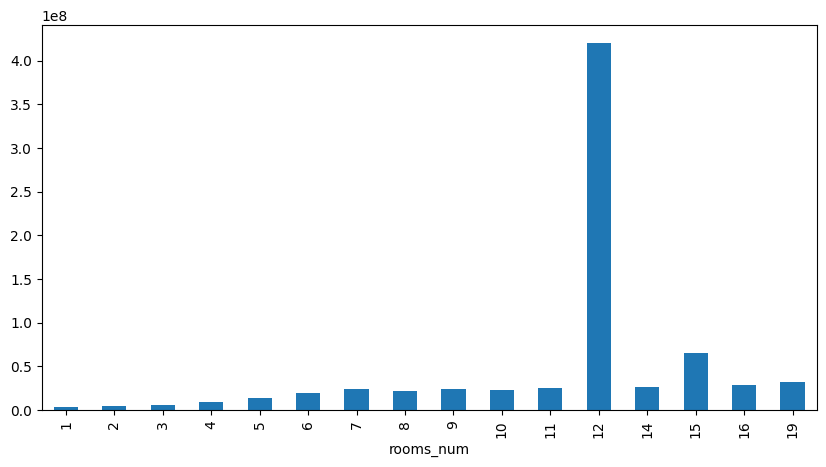

In [88]:
data.groupby('rooms_num')['last_price'].median().plot(kind="bar", figsize=s)
plt.show()

In [89]:
# вычислим коэффициент корреляции Пирсона
data['living_area'].corr(data['rooms_num']).round(2)

0.85

**Вывод:**

Наблюдаем сильную положительную корреляцию между ценой квартиры и количеством комнат

### Зависимость цены от этажа

- Cгруппируем данные по типу этажа ("первый", "последний", "другой").
- Вычислим медианы цен на квартиры для каждой группы.
- Построим столбчатую диаграмму.

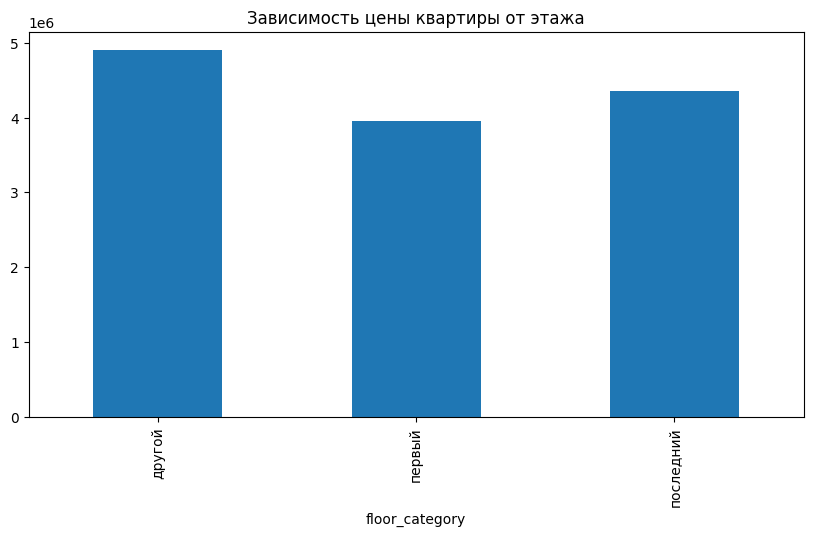

In [90]:
data.groupby('floor_category')['last_price'].median().plot(
    kind="bar", 
    figsize=s,
    title = 'Зависимость цены квартиры от этажа')
plt.show()

**Вывод:**

Стоимость квартиры зависит от типа этажа. Наиболее низкая цена у квартир на первом этаже, также снижается цена квартир на последнем этаже.

### Зависимость цены от даты размещения

- Сгруппируем данные по дню недели, месяцу, году. 
- Для каждой группировки построим график зависимости медианной цены квартиры от этих параметров.

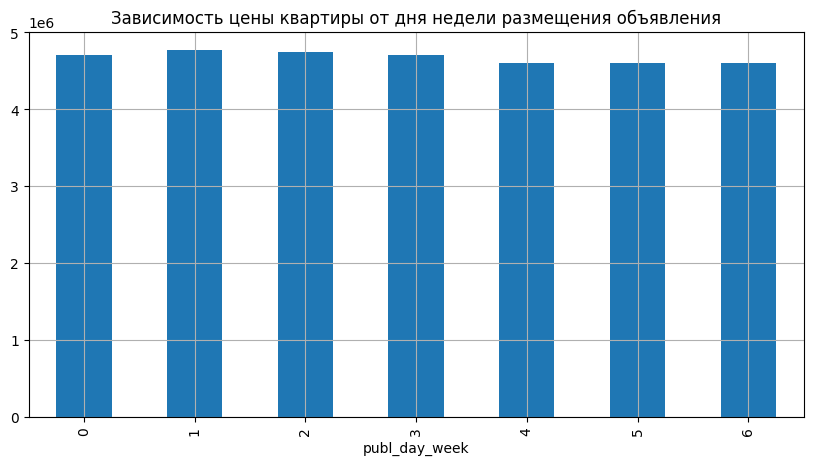

In [91]:
# зависимость цены от дня недели, в который было размещено объявление (0-ПН, 6-ВС)
data.groupby('publ_day_week')['last_price'].median().plot(
    kind="bar", 
    figsize=s,
    grid=True, 
    title = 'Зависимость цены квартиры от дня недели размещения объявления')
plt.show()

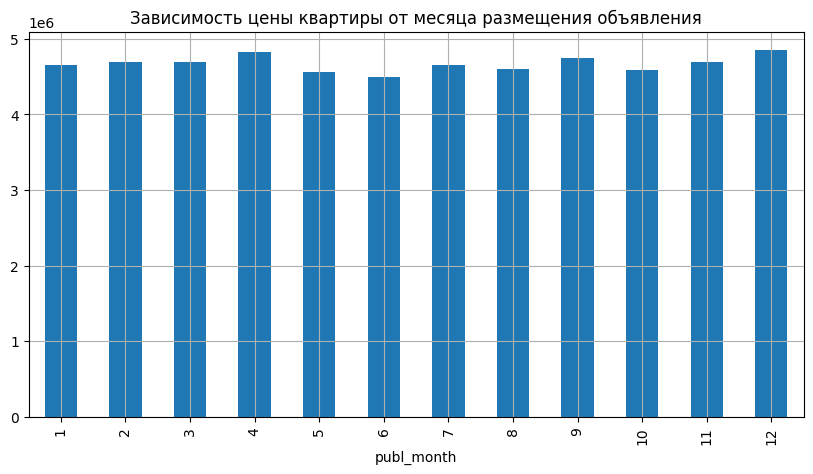

In [92]:
# зависимость цены от месяца, в котором было размещено объявление
data.groupby('publ_month')['last_price'].median().plot(
    kind="bar", 
    figsize=s,
    grid=True, 
    title = 'Зависимость цены квартиры от месяца размещения объявления')
plt.show()

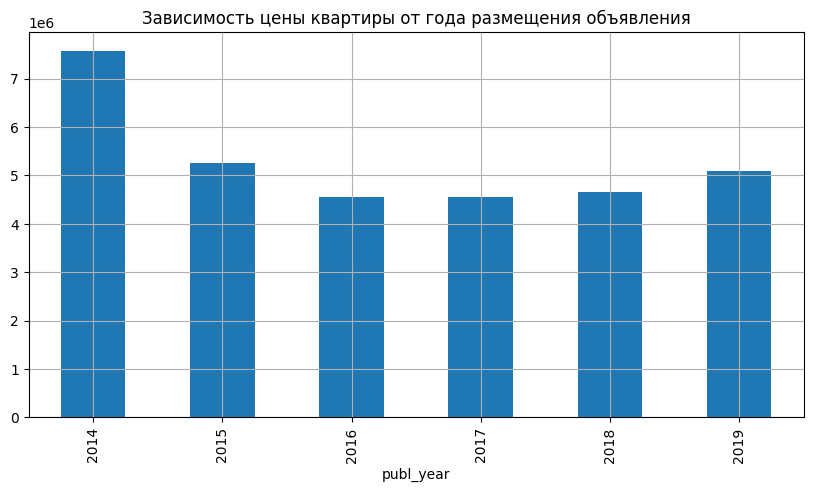

In [93]:
# зависимость цены квартиры от года, в котором было размещено объявление
data.groupby('publ_year')['last_price'].median().plot(
    kind="bar", 
    figsize=s, 
    grid=True, 
    title = 'Зависимость цены квартиры от года размещения объявления')
plt.show()

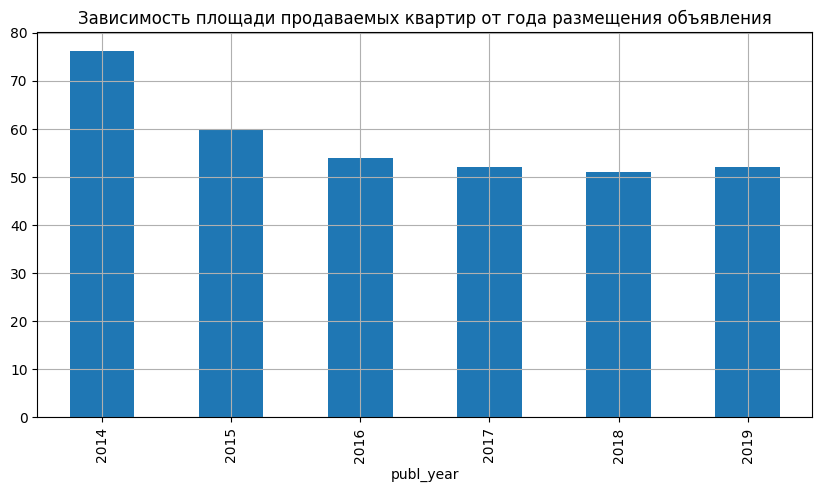

In [94]:
# зависимость площади от года, в котором было размещено объявление
data.groupby('publ_year')['total_area'].median().plot(
    kind="bar", 
    figsize=s,
    grid=True, 
    title = 'Зависимость площади продаваемых квартир от года размещения объявления')
plt.show()

Снижение цены шло параллельно со снижением площади продаваемых квартир. Более корректно анализировать динамику цен 1 кв. м. недвижимости.

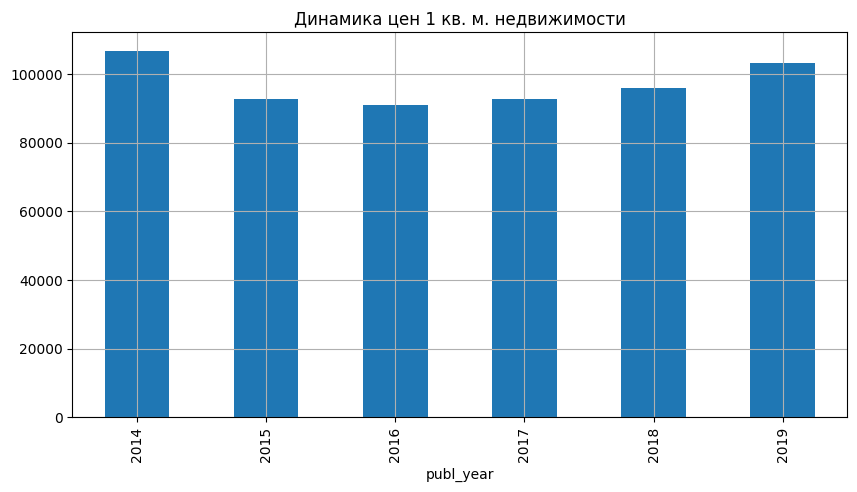

In [95]:
# зависимость цены 1 кв. м. недвижимости от года, в котором было размещено объявление
data.groupby('publ_year')['price_sq_m'].median().plot(
    kind="bar", 
    figsize=s,
    grid=True, 
    title = 'Динамика цен 1 кв. м. недвижимости')
plt.show()

Динамика стоимости квадратного метра показывает снижение цен до 2016 года, а затем плавное восстановление почти до исходного значения.

Проверим зависимость цены 1 кв. м. от дня недели и от месяца размещения объявления.

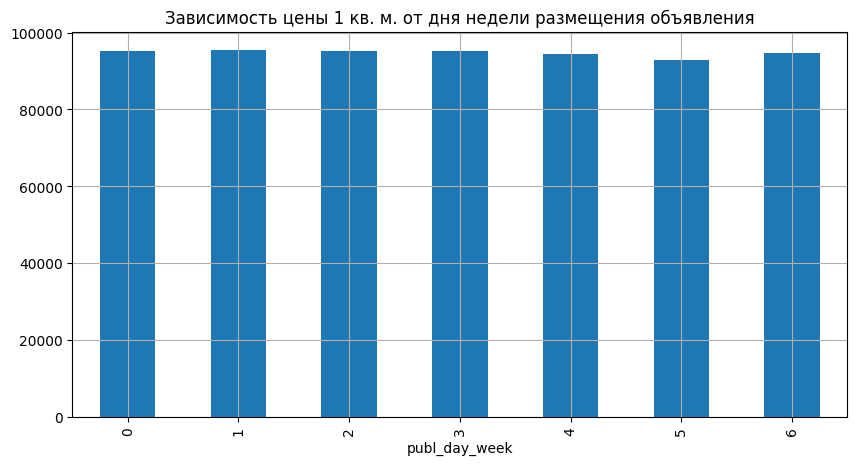

In [96]:
# зависимость цены 1 кв. м. от дня недели, в который было размещено объявление (0-ПН, 6-ВС)
data.groupby('publ_day_week')['price_sq_m'].median().plot(
    kind="bar", 
    figsize=s,
    grid=True, 
    title = 'Зависимость цены 1 кв. м. от дня недели размещения объявления')
plt.show()

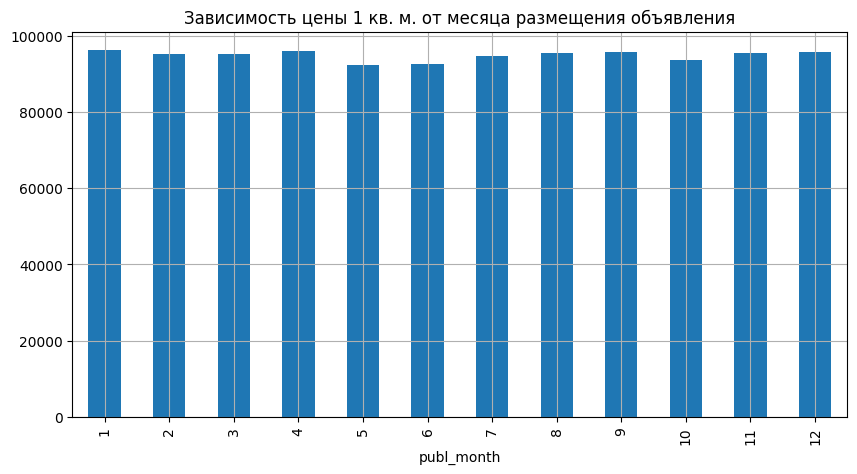

In [97]:
# зависимость цены 1 кв. м. от месяца, в котором было размещено объявление
data.groupby('publ_month')['price_sq_m'].median().plot(
    kind="bar", 
    figsize=s,
    grid=True, 
    title = 'Зависимость цены 1 кв. м. от месяца размещения объявления')
plt.show()

По аналогии с ценой квартиры, зависимость цены 1 кв. м. от даты размещения заметнее всего проявляется на годовом графике.

**Вывод:**

Цена квартиры зависит от года размещения объявления. Поскольку из года в год меняется и площадь продаваемых квартир, то наиболее показательной является динамика цен 1 кв. метра квартиры.

### Зависимость цены от расстояния до центра города

Для г. Санкт-Петербург установим зависимость цены от расстояния до центра: 
- посчитаем среднюю цену каждого километра;
- построим график изменения средней цены для каждого километра от центра города.

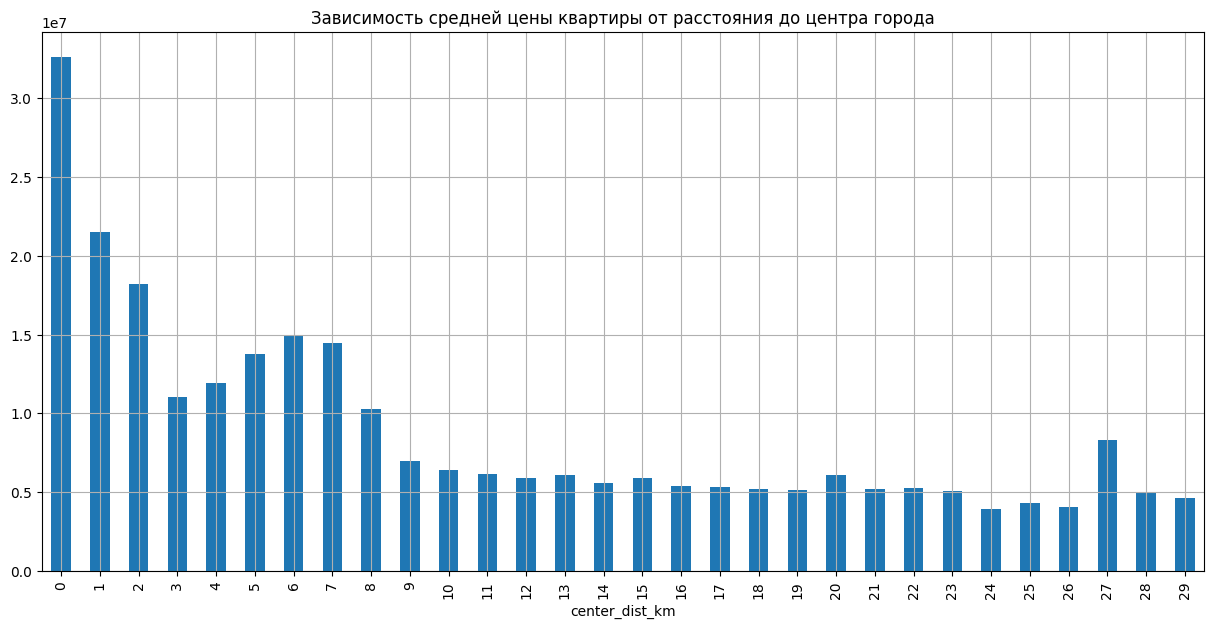

In [98]:
# посчитаем среднюю цену каждого километра и построим график
(data 
 .query('locality_name == "Санкт-Петербург"')
 .groupby('center_dist_km')['last_price']
 .mean()
 .plot(kind="bar", figsize=(15,7), grid=True, title = 'Зависимость средней цены квартиры от расстояния до центра города'))

plt.show()

**Вывод:**

Прослеживается тенденция снижения средней цены квадратного метра по мере удаления от центра Санкт-Петербурга.